# 1. Minh họa Gradient Descent cho Hồi quy Tuyến tính (Linear Regression)

Mục tiêu là tìm các tham số $\theta = [\theta_0, \theta_1]$ để hàm dự đoán $h_{\theta}(x)$ khớp nhất với dữ liệu.

* **Hàm giả thuyết (Hypothesis Function):**
    $$h_{\theta}(x) = \theta_0 + \theta_1 x$$
* **Hàm mất mát (Cost Function - MSE):**
    $$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2$$
* **Đạo hàm riêng (Gradient) và Quy tắc cập nhật:**
    $$\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})$$
    $$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}$$
    $$\theta_j := \theta_j - \alpha \frac{\partial J}{\partial \theta_j}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Phân tích Minh họa Thực tế (Practical Illustrations)

Phần này phân tích kết quả của thuật toán Gradient Descent trên ba ví dụ cụ thể, làm rõ cơ chế hội tụ của các tham số.

In [4]:
# Minh họa A: Tối ưu hóa Hàm số f(x) = (x+5)^2
print("---------------------------------------------------------------------")
print("Minh họa A: Tối ưu hóa Hàm số f(x) = (x+5)^2")
# Parameters
max_iters = 30    # Chạy 30 bước
precision = 0.0001  # Điều kiện dừng
lr = 0.1     # Learning rate
x = 3       

x_history = []
f_history = []

for i in range(max_iters):
    f_pre = (x + 5) ** 2
    if i < 5 or (i % 5 == 0 and i > 5) or i == max_iters - 1:
        print(f"Step {i}: x = {x:.4f}  --> f(x) = {f_pre:.6f}")
    
    dxy = 2 * (x + 5)
    x = x - lr * (dxy)
    f_cur = (x + 5) ** 2
    
    x_history.append(x)
    f_history.append(f_cur)

    if abs(f_cur - f_pre) < precision: 
        break

print(f"...")
print(f"The local minimum occurs at x={x:.4f} with f(x) = {f_cur:.6f} after {i} steps.")
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
Minh họa A: Tối ưu hóa Hàm số f(x) = (x+5)^2
Step 0: x = 3.0000  --> f(x) = 64.000000
Step 1: x = 1.4000  --> f(x) = 40.960000
Step 2: x = 0.1200  --> f(x) = 26.214400
Step 3: x = -0.9040  --> f(x) = 16.777216
Step 4: x = -1.7232  --> f(x) = 10.737418
Step 10: x = -4.1410  --> f(x) = 0.737870
Step 15: x = -4.7185  --> f(x) = 0.079228
Step 20: x = -4.9078  --> f(x) = 0.008507
Step 25: x = -4.9698  --> f(x) = 0.000913
...
The local minimum occurs at x=-4.9876 with f(x) = 0.000153 after 28 steps.
---------------------------------------------------------------------


### Phân tích Kết quả Tối ưu hóa Hàm $f(x) = (x+5)^2$

Quá trình khởi tạo từ **$x=3$** với tốc độ học $\alpha=0.1$ cho thấy sự hội tụ nhanh chóng về cực tiểu lý thuyết **$x=-5$** ($f(x)=0$).

**Nhận xét:**

* Mỗi bước lặp, **Gradient $\left(\frac{dy}{dx}\right)$** giảm dần, dẫn đến bước cập nhật ($-\alpha \times \frac{dy}{dx}$) càng nhỏ khi **$x$** tiến gần đến **$-5$**. Điều này thể hiện thuật toán đang **giảm tốc độ hội tụ** khi tiếp cận cực tiểu, tránh overshoot (vượt qua) mục tiêu.
* Thuật toán dừng khi sự thay đổi của $f(x)$ (Cost) nhỏ hơn ngưỡng $\epsilon = 0.0001$, đạt kết quả $x \approx -4.9876$ sau 28 bước.

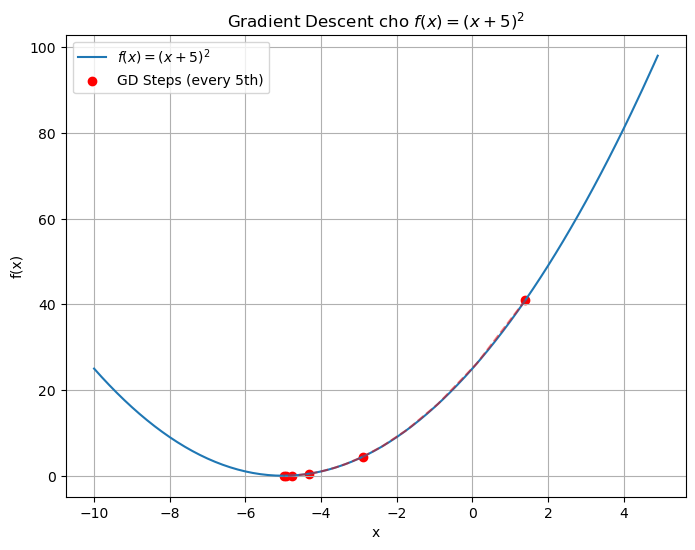

In [5]:
# Vẽ đồ thị Hàm số và các bước hội tụ
x_plot = np.arange(-10, 5, 0.1)
y_plot = (x_plot + 5)**2

plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_plot, label='$f(x) = (x+5)^2$')
plt.scatter(x_history[::5], f_history[::5], color='red', marker='o', label='GD Steps (every 5th)')
plt.plot(x_history, f_history, 'r--', alpha=0.5)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent cho $f(x) = (x+5)^2$')
plt.grid(True)
plt.legend()
plt.show()

### Dữ liệu mẫu

| $i$ | $x^{(i)}$ | $y^{(i)}$ |
|---|---|---|
| 1 | 1 | 2 |
| 2 | 2 | 4 |
| 3 | 3 | 5 |

**Tham số khởi tạo:** $\theta_0 = 0, \theta_1 = 0$.
**Tốc độ học ($\alpha$):** $0.01$.

In [6]:
# Dữ liệu
X = np.array([1, 2, 3])
Y = np.array([2, 4, 5])
m = len(X) # m = 3

# Tham số và Tốc độ học
theta0 = 0.0
theta1 = 0.0
alpha = 0.01

# Chạy Gradient Descent cho 5 bước
max_steps = 5

print("Minh họa Gradient Descent cho Hồi quy Tuyến tính")
print(f"Dữ liệu: X={X}, Y={Y}, m={m}")
print(f"Tham số khởi tạo: theta0={theta0}, theta1={theta1}, alpha={alpha}")
print("---------------------------------------------------------------------")

for step in range(max_steps):
    # 1. Tính Hypothesis (h_theta) và Error (Sai số)
    H_theta = theta0 + theta1 * X
    Error = H_theta - Y

    # 2. Tính Gradient (đạo hàm riêng)
    dJ_dtheta0 = np.sum(Error) / m
    dJ_dtheta1 = np.sum(Error * X) / m

    # 3. Tính Cost (Hàm mất mát)
    J_cost = np.sum(Error**2) / (2 * m)

    # 4. Cập nhật tham số
    theta0_new = theta0 - alpha * dJ_dtheta0
    theta1_new = theta1 - alpha * dJ_dtheta1

    print(f"Bước {step}: J(cost) = {J_cost:.4f}")
    print(f"  - Sai số (Error): {Error}")
    print(f"  - Đạo hàm dJ/d(theta0): {dJ_dtheta0:.4f}")
    print(f"  - Đạo hàm dJ/d(theta1): {dJ_dtheta1:.4f}")
    print(f"  - Cập nhật theta0: {theta0} - {alpha} * {dJ_dtheta0:.4f} = {theta0_new:.4f}")
    print(f"  - Cập nhật theta1: {theta1} - {alpha} * {dJ_dtheta1:.4f} = {theta1_new:.4f}")

    # Chuẩn bị cho bước tiếp theo
    theta0 = theta0_new
    theta1 = theta1_new
    print("---------------------------------------------------------------------")

print(f"Tham số cuối cùng sau {max_steps} bước: theta0={theta0:.4f}, theta1={theta1:.4f}")

Minh họa Gradient Descent cho Hồi quy Tuyến tính
Dữ liệu: X=[1 2 3], Y=[2 4 5], m=3
Tham số khởi tạo: theta0=0.0, theta1=0.0, alpha=0.01
---------------------------------------------------------------------
Bước 0: J(cost) = 7.5000
  - Sai số (Error): [-2. -4. -5.]
  - Đạo hàm dJ/d(theta0): -3.6667
  - Đạo hàm dJ/d(theta1): -8.3333
  - Cập nhật theta0: 0.0 - 0.01 * -3.6667 = 0.0367
  - Cập nhật theta1: 0.0 - 0.01 * -8.3333 = 0.0833
---------------------------------------------------------------------
Bước 1: J(cost) = 6.6941
  - Sai số (Error): [-1.88       -3.79666667 -4.71333333]
  - Đạo hàm dJ/d(theta0): -3.4633
  - Đạo hàm dJ/d(theta1): -7.8711
  - Cập nhật theta0: 0.03666666666666667 - 0.01 * -3.4633 = 0.0713
  - Cập nhật theta1: 0.08333333333333334 - 0.01 * -7.8711 = 0.1620
---------------------------------------------------------------------
Bước 2: J(cost) = 5.9751
  - Sai số (Error): [-1.76665556 -3.60461111 -4.44256667]
  - Đạo hàm dJ/d(theta0): -3.2713
  - Đạo hàm dJ/d(theta

### Phân tích Kết quả Cập nhật Tham số Linear Regression

Bảng tóm tắt dưới đây theo dõi sự thay đổi của các tham số và Gradient trong 5 bước lặp đầu tiên:

| Bước | $J(\theta)$ | $\theta_0^{\text{trước}}$ | $\theta_1^{\text{trước}}$ | $\frac{\partial J}{\partial \theta_0}$ | $\frac{\partial J}{\partial \theta_1}$ | $\theta_0^{\text{sau}}$ | $\theta_1^{\text{sau}}$ |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 0 | 7.5000 | 0.0000 | 0.0000 | -3.6667 | -8.3333 | 0.0367 | 0.0833 |
| 1 | 6.6941 | 0.0367 | 0.0833 | -3.4633 | -7.8711 | 0.0713 | 0.1620 |
| 2 | 5.9751 | 0.0713 | 0.1620 | -3.2713 | -7.4345 | 0.1040 | 0.2364 |
| 3 | 5.3337 | 0.1040 | 0.2364 | -3.0899 | -7.0222 | 0.1349 | 0.3066 |
| 4 | 4.7614 | 0.1349 | 0.3066 | -2.9185 | -6.6327 | 0.1641 | 0.3729 |

**Nhận xét:** Hàm mất mát $J(\theta)$ giảm đều đặn, từ **$7.5000$ xuống $4.7614$**, khẳng định thuật toán đang điều chỉnh các tham số về hướng tối ưu để đường thẳng dự đoán khớp với dữ liệu 



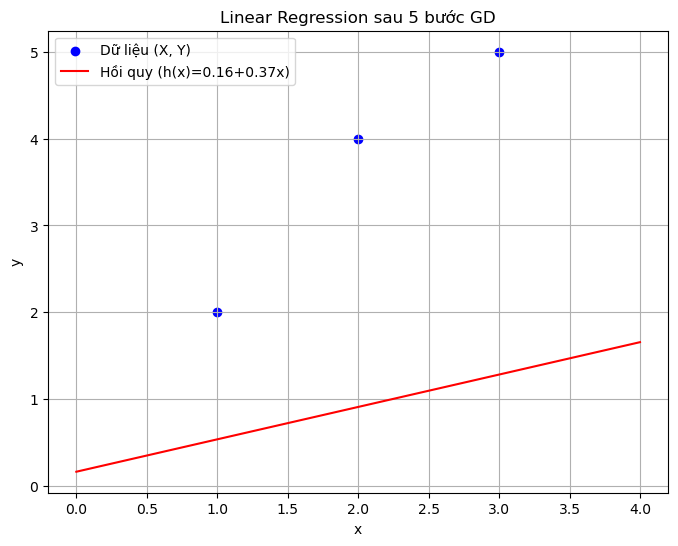

In [7]:
# Vẽ đồ thị đường thẳng hồi quy tuyến tính
X_data = np.array([1, 2, 3])
Y_data = np.array([2, 4, 5])
theta0_final = 0.1641  # Lấy từ Output cuối cùng
theta1_final = 0.3729

# Tạo đường thẳng dự đoán cuối cùng
X_range = np.linspace(0, 4, 100)
Y_pred = theta0_final + theta1_final * X_range

plt.figure(figsize=(8, 6))
plt.scatter(X_data, Y_data, color='blue', label='Dữ liệu (X, Y)')
plt.plot(X_range, Y_pred, color='red', label=f'Hồi quy (h(x)={theta0_final:.2f}+{theta1_final:.2f}x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression sau 5 bước GD')
plt.grid(True)
plt.legend()
plt.show()

# 2. Minh họa Gradient Descent cho Hồi quy Logistic (Logistic Regression)

Hồi quy Logistic sử dụng hàm Sigmoid để phân loại và hàm mất mát Cross-Entropy (Log Loss).

* **Hàm Sigmoid (Hypothesis Function):**
    $$h_{\theta}(x) = g(\theta^T x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2)}}$$
* **Đạo hàm riêng (Gradient) và Quy tắc cập nhật:**
    $$\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}$$
    $$\theta_j := \theta_j - \alpha \frac{\partial J}{\partial \theta_j}$$

### Dữ liệu mẫu (OR Logic Gate Data)

| $i$ | $x_1^{(i)}$ | $x_2^{(i)}$ | $y^{(i)}$ |
|---|---|---|---|
| 1 | 0 | 0 | 0 |
| 2 | 0 | 1 | 1 |
| 3 | 1 | 0 | 1 |
| 4 | 1 | 1 | 1 |

**Tham số khởi tạo:** $\theta = [0, 0, 0]$.
**Tốc độ học ($\alpha$):** $0.1$.

In [12]:
# Dữ liệu
X_raw = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# Thêm cột bias x0=1 vào X
X = np.insert(X_raw, 0, 1, axis=1) # X = [[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
Y = np.array([0, 1, 1, 1])
m = len(Y) # m = 4

# Hàm Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Tham số và Tốc độ học
theta = np.zeros(X.shape[1]) # [theta0, theta1, theta2] = [0, 0, 0]
alpha = 0.1

# Chạy Gradient Descent cho 10 bước
max_steps = 10 

print("Minh họa Gradient Descent cho Hồi quy Logistic")
print(f"Dữ liệu (X_raw): \n{X_raw}")
print(f"Tham số khởi tạo: theta={np.round(theta, 4)}, alpha={alpha}")
print("---------------------------------------------------------------------")

for step in range(max_steps):
    # 1. Tính Hypothesis (h_theta)
    Z = np.dot(X, theta)
    H_theta = sigmoid(Z)
    
    # 2. Tính Error (Sai số) và Gradient (đạo hàm riêng)
    Error = H_theta - Y # (h_theta(x) - y)
    
    # Gradient cho từng tham số (dJ/d(theta_j))
    Gradient = np.dot(X.T, Error) / m

    # 3. Cập nhật tham số
    theta_new = theta - alpha * Gradient

    print(f"Bước {step}:")
    print(f"  - Z (X @ theta): {np.round(Z, 4)}")
    print(f"  - H_theta (Sigmoid): {np.round(H_theta, 4)}")
    print(f"  - Sai số (Error): {np.round(Error, 4)}")
    print(f"  - Gradient: {np.round(Gradient, 4)}")
    print(f"  - Cập nhật theta: {np.round(theta, 4)} - {alpha} * {np.round(Gradient, 4)} = {np.round(theta_new, 4)}")

    # Chuẩn bị cho bước tiếp theo
    theta = theta_new
    print("---------------------------------------------------------------------")

print(f"Tham số cuối cùng sau {max_steps} bước: theta={np.round(theta, 4)}")

Minh họa Gradient Descent cho Hồi quy Logistic
Dữ liệu (X_raw): 
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Tham số khởi tạo: theta=[0. 0. 0.], alpha=0.1
---------------------------------------------------------------------
Bước 0:
  - Z (X @ theta): [0. 0. 0. 0.]
  - H_theta (Sigmoid): [0.5 0.5 0.5 0.5]
  - Sai số (Error): [ 0.5 -0.5 -0.5 -0.5]
  - Gradient: [-0.25 -0.25 -0.25]
  - Cập nhật theta: [0. 0. 0.] - 0.1 * [-0.25 -0.25 -0.25] = [0.025 0.025 0.025]
---------------------------------------------------------------------
Bước 1:
  - Z (X @ theta): [0.025 0.05  0.05  0.075]
  - H_theta (Sigmoid): [0.5062 0.5125 0.5125 0.5187]
  - Sai số (Error): [ 0.5062 -0.4875 -0.4875 -0.4813]
  - Gradient: [-0.2375 -0.2422 -0.2422]
  - Cập nhật theta: [0.025 0.025 0.025] - 0.1 * [-0.2375 -0.2422 -0.2422] = [0.0488 0.0492 0.0492]
---------------------------------------------------------------------
Bước 2:
  - Z (X @ theta): [0.0488 0.098  0.098  0.1472]
  - H_theta (Sigmoid): [0.5122 0.5245 0.5245 0.5367]
  

### 3.3. Phân tích Kết quả Cập nhật Tham số Logistic Regression (OR Gate)

Việc tăng số bước lặp từ 3 lên 10 cho thấy quá trình các tham số ($\theta_0, \theta_1, \theta_2$) dần dần cập nhật để học đường ranh giới quyết định.

| Bước | $\theta_0$ | $\theta_1$ | $\theta_2$ | Gradient $\frac{\partial J}{\partial \theta_0}$ |
|:---:|:---:|:---:|:---:|:---:|
| 0 | 0.0250 | 0.0250 | 0.0250 | -0.2375 |
| 5 | 0.1323 | 0.1389 | 0.1389 | -0.1927 |
| 9 | **0.1999** | **0.2186** | **0.2186** | -0.1556 |

**Nhận xét:**

1.  **Hội tụ ban đầu:** Trong những bước đầu (0-5), các tham số tăng nhanh hơn. Gradient (ví dụ: $\frac{\partial J}{\partial \theta_0}$) có giá trị tuyệt đối lớn, dẫn đến bước cập nhật $\alpha \times \text{Gradient}$ lớn.
2.  **Giảm tốc độ:** Khi tiến gần đến bước 9, giá trị Gradient giảm dần (từ -0.2500 xuống -0.1556), cho thấy mô hình đang di chuyển chậm hơn trong không gian tham số.
3.  **Kết quả:** Sau 10 bước, các tham số $\theta$ đã tích lũy một giá trị dương đáng kể ($\approx 0.2$). Điều này có nghĩa là mô hình đã tạo ra một hàm $h_{\theta}(x)$ mà khi $x_1=0, x_2=0$ (điểm Y=0), giá trị $Z$ vẫn còn thấp, giữ xác suất $H_{\theta}$ gần 0.5; còn khi $x_1$ hoặc $x_2$ là 1 (các điểm Y=1), giá trị $Z$ sẽ tăng lên, đẩy xác suất $H_{\theta}$ về gần 1.

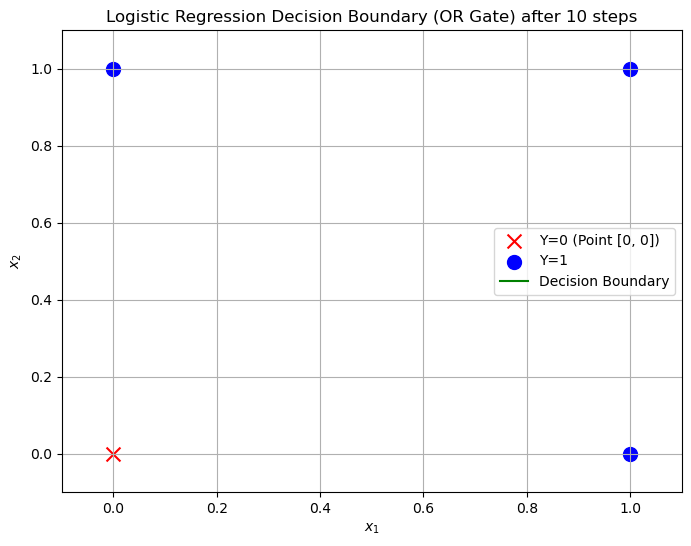

In [13]:
# Vẽ đồ thị Đường ranh giới quyết định (Decision Boundary)
# Sử dụng tham số cuối cùng sau 10 bước lặp
theta0_final = 0.1999
theta1_final = 0.2186
theta2_final = 0.2186

# Dữ liệu OR
X_raw = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
Y = np.array([0, 1, 1, 1])
X_0 = X_raw[Y == 0]
X_1 = X_raw[Y == 1]

# Tính đường ranh giới: x2 = (-theta0 - theta1*x1) / theta2
# Decision Boundary: theta0 + theta1*x1 + theta2*x2 = 0
x1_db = np.array([-0.5, 1.5])
if np.abs(theta2_final) > 1e-6:
    x2_db = (-theta0_final - theta1_final * x1_db) / theta2_final
else:
    x2_db = np.array([-1, 2]) # Trường hợp theta2 quá nhỏ, tạo đường gần như đứng

plt.figure(figsize=(8, 6))
plt.scatter(X_0[:, 0], X_0[:, 1], color='red', marker='x', s=100, label='Y=0 (Point [0, 0])')
plt.scatter(X_1[:, 0], X_1[:, 1], color='blue', marker='o', s=100, label='Y=1')
plt.plot(x1_db, x2_db, color='green', linestyle='-', label='Decision Boundary')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Logistic Regression Decision Boundary (OR Gate) after 10 steps')
plt.grid(True)
plt.legend()
plt.show()

In [3]:
# Dữ liệu
X_raw = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# Thêm cột bias x0=1 vào X
X = np.insert(X_raw, 0, 1, axis=1)
Y = np.array([0, 1, 1, 1])
m = len(Y)

# Hàm Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Tham số và Tốc độ học
theta = np.zeros(X.shape[1])
alpha = 0.1

# TĂNG SỐ BƯỚC LẶP: Đảm bảo hội tụ
max_steps = 500 

for step in range(max_steps):
    Z = np.dot(X, theta)
    H_theta = sigmoid(Z)
    Error = H_theta - Y
    Gradient = np.dot(X.T, Error) / m
    theta = theta - alpha * Gradient

# Lưu kết quả cuối cùng
theta_final_logreg = theta

print(f"Hồi quy Logistic đã hội tụ sau {max_steps} bước.")
print(f"Tham số cuối cùng: theta={np.round(theta_final_logreg, 4)}")
# In ra các tham số đã hội tụ
theta0_final = theta_final_logreg[0]
theta1_final = theta_final_logreg[1]
theta2_final = theta_final_logreg[2]

Hồi quy Logistic đã hội tụ sau 500 bước.
Tham số cuối cùng: theta=[-0.7878  2.8272  2.8272]


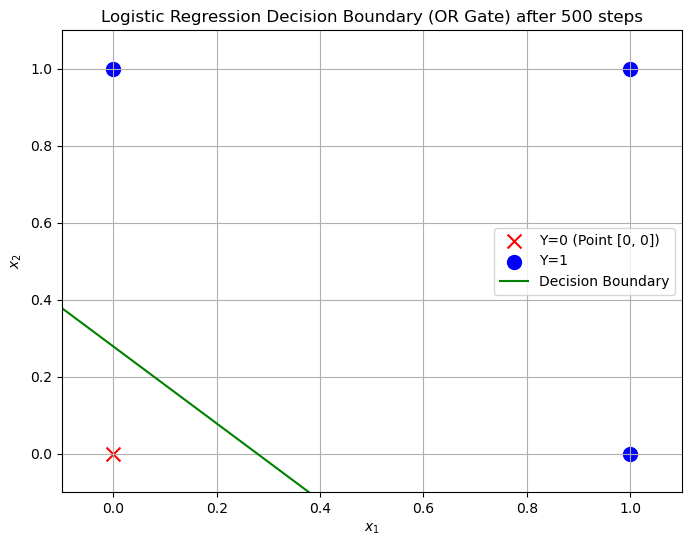

In [4]:
# Cell 14: Vẽ Đồ thị Decision Boundary
# Tham số đã hội tụ sau 500 bước
theta0_final = theta_final_logreg[0]
theta1_final = theta_final_logreg[1]
theta2_final = theta_final_logreg[2]

# Dữ liệu OR
X_raw = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
Y = np.array([0, 1, 1, 1])
X_0 = X_raw[Y == 0]
X_1 = X_raw[Y == 1]

# Tính đường ranh giới: x2 = (-theta0 - theta1*x1) / theta2
# Đường ranh giới sẽ nằm giữa x1 = -0.5 và x1 = 1.5
x1_db = np.array([-0.5, 1.5])
if np.abs(theta2_final) > 1e-6:
    x2_db = (-theta0_final - theta1_final * x1_db) / theta2_final
else:
    x2_db = np.array([-1, 2]) # Trường hợp ngoại lệ

plt.figure(figsize=(8, 6))
plt.scatter(X_0[:, 0], X_0[:, 1], color='red', marker='x', s=100, label='Y=0 (Point [0, 0])')
plt.scatter(X_1[:, 0], X_1[:, 1], color='blue', marker='o', s=100, label='Y=1')
plt.plot(x1_db, x2_db, color='green', linestyle='-', label='Decision Boundary')

# Đặt lại giới hạn trục để đảm bảo thấy đường ranh giới
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title(f'Logistic Regression Decision Boundary (OR Gate) after 500 steps')
plt.grid(True)
plt.legend()
plt.show()